# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

During COVID-19, GPs have been encouraged to switch patients from Warfarin to alternative anticoagulants called Direct Oral Anticoagulants (DOACs) as they require less frequent monitoring and avoid additional visits to the GP practice. DOACs do however require renal function tests to ensure the correct dose is prescribed to avoid harm in patients. This evaluation wants to identify the proportion of patients who are at risk of harm whilst prescribed the incorrect dose of DOAC.

Data for this report has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately 18.6m Jan-18, rising to approximately 19.7m Dec-21.

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%y')

### The number and proportion of people prescribed DOACs since January 2018

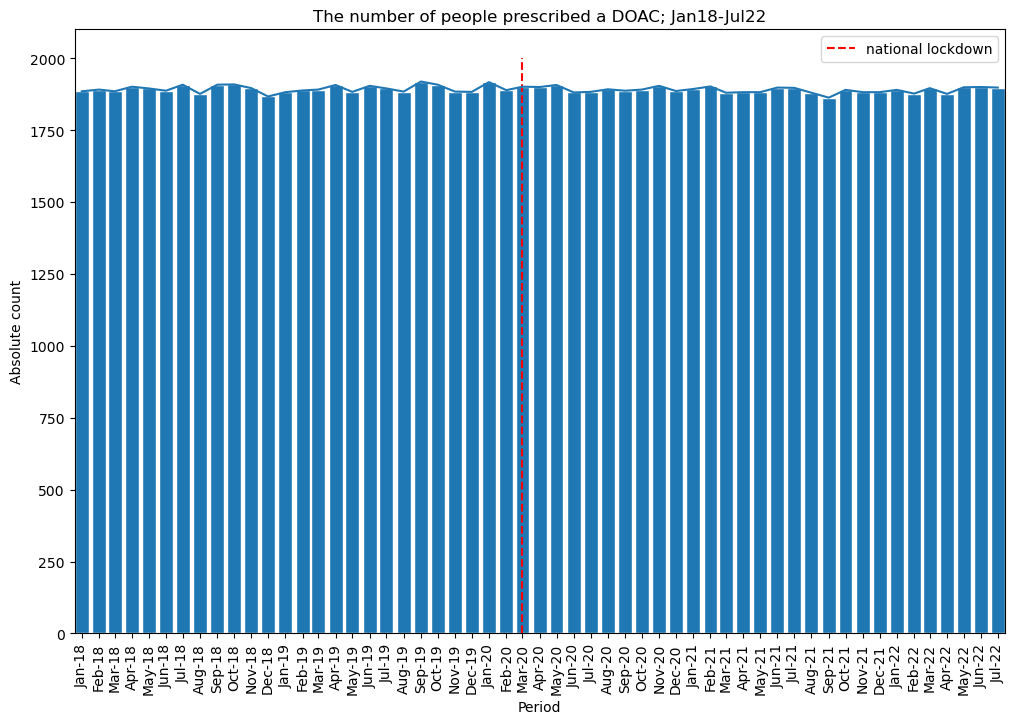

In [2]:
all_df=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "on_doac", "population"], parse_dates=["date"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_df["date"]
y1_coordinates=summary_df["on_doac"]
plt.figure(figsize=(12,8), dpi=100)
plt.bar(x1_coordinates, y1_coordinates, edgecolor='white',width=25)
plt.plot(x1_coordinates, y1_coordinates)
plt.ylabel('Absolute count')
plt.xlabel('Period')
plt.title('The number of people prescribed a DOAC; Jan18-Jul22')
#
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=2000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.legend()
plt.savefig(f'../output/filtered/plot_01_all_doacs_absolute.png', bbox_inches='tight', dpi=100)
plt.show()

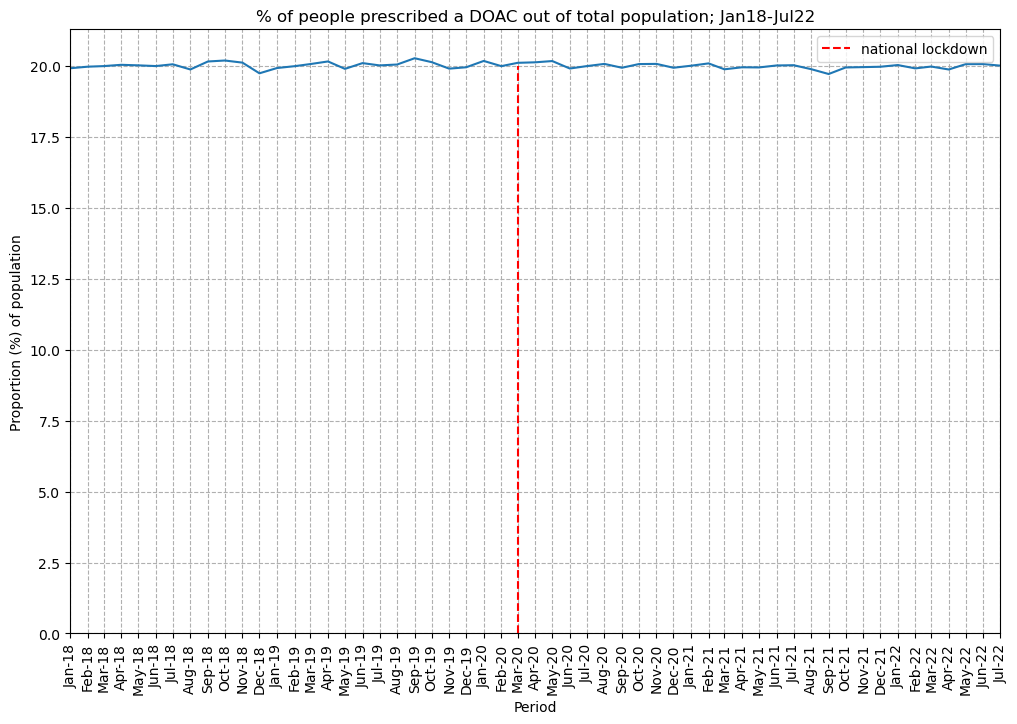

In [3]:
all_trend=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "on_doac", "value", "population"], parse_dates=["date"])
all_trend['value'] = 100 * all_trend['value']
summary_trend=all_trend.groupby(["date"], as_index=False)["value"].mean()
x1_coordinates=summary_trend["date"]
y1_coordinates=summary_trend["value"]
plt.figure(figsize=(12,8), dpi=100)
plt.plot(x1_coordinates, y1_coordinates)
plt.ylabel('Proportion (%) of population')
plt.xlabel('Period')
plt.title('% of people prescribed a DOAC out of total population; Jan18-Jul22')
#
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=20,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.grid(linestyle="dashed")
plt.legend()
plt.savefig(f'../output/filtered/plot_02_all_doacs_proportion.png', bbox_inches='tight', dpi=100)
plt.show()

### The change in prescribing behaviour related to DOACs since January 2018 broken down by patient demographics 

#### 1. Number of people (absolute & normalised) prescribed a DOAC by region

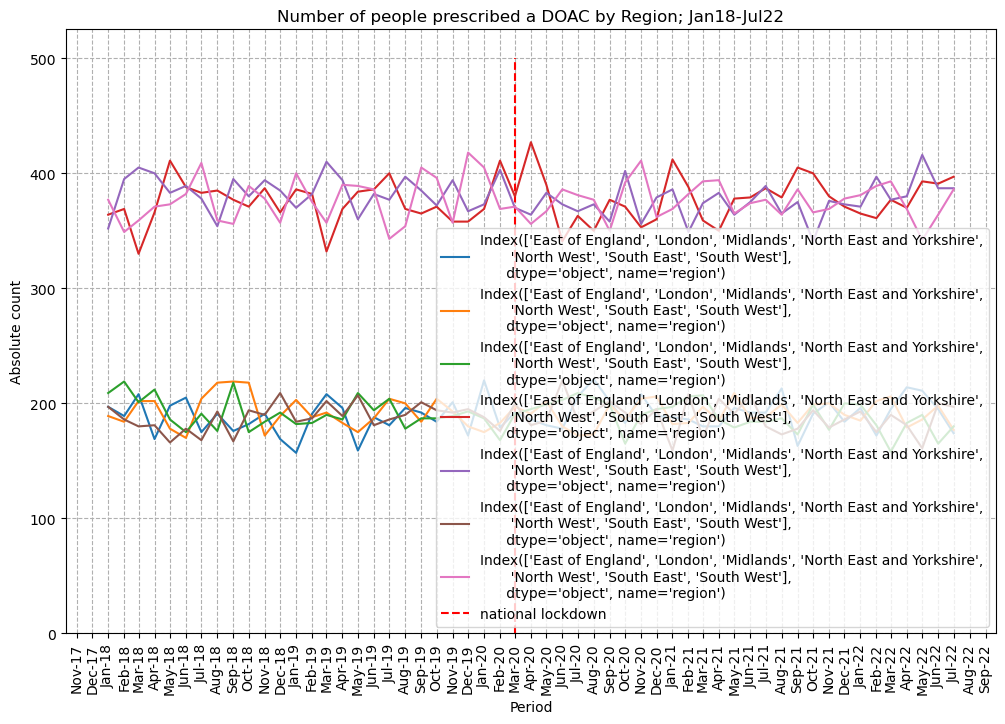

In [27]:
region_line=pd.read_csv("../output/filtered/measure_doacs_by_region_rate.csv", usecols=["date", "region", "on_doac", "population"], parse_dates=["date"])
region_subset2=region_line.loc[region_line["region"].notnull(), :]
pivot_region2=region_subset2.pivot(index='date', columns='region', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)
plt.plot(pivot_region2, label=pivot_region2.columns)
plt.ylabel('Absolute count')
plt.xlabel('Period')
plt.title('Number of people prescribed a DOAC by Region; Jan18-Jul22')
#
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=500,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.legend()
plt
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_03_all_doacs_by_region_absolute.png', bbox_inches='tight', dpi=100)
plt.show()

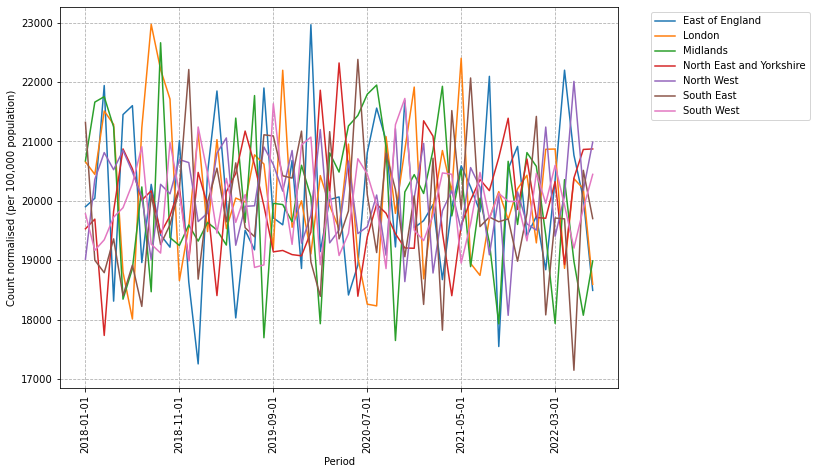

In [5]:
region_trend=pd.read_csv("../output/filtered/measure_doacs_by_region_rate.csv", usecols=["date", "region", "on_doac", "population"])
region_trend['on_doac'] = (region_trend['on_doac'] / region_trend['population'] * 100000)
region_subset3=region_trend.loc[region_trend["region"].notnull(), :]
pivot_region3=region_subset3.pivot(index='date', columns='region', values='on_doac')
pivot_region3.plot(kind='line', figsize=(10,7))
plt.ylabel('Count normalised (per 100,000 population)')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_04_all_doacs_by_region_normalised.png')
plt.show()

#### 2. Number of people (absolute & normalised) prescribed a DOAC by age band - excludes patients with a missing age

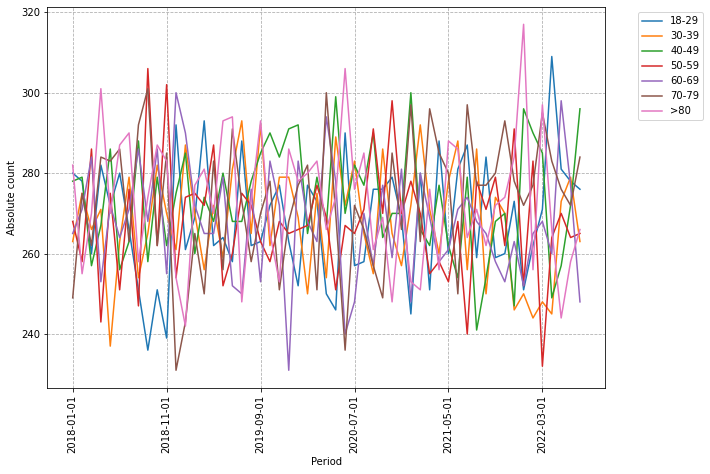

In [6]:
age_line=pd.read_csv("../output/filtered/measure_doacs_by_age_band_rate.csv", usecols=["date", "age_band", "on_doac", "population"])
age_subset2=age_line.loc[age_line["age_band"] != "missing", :]
pivot_age2=age_subset2.pivot(index='date', columns='age_band', values='on_doac')
pivot_age2.plot(kind='line', figsize=(10,7))
plt.ylabel('Absolute count')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_05_all_doacs_by_age_band_absolute.png')
plt.show()

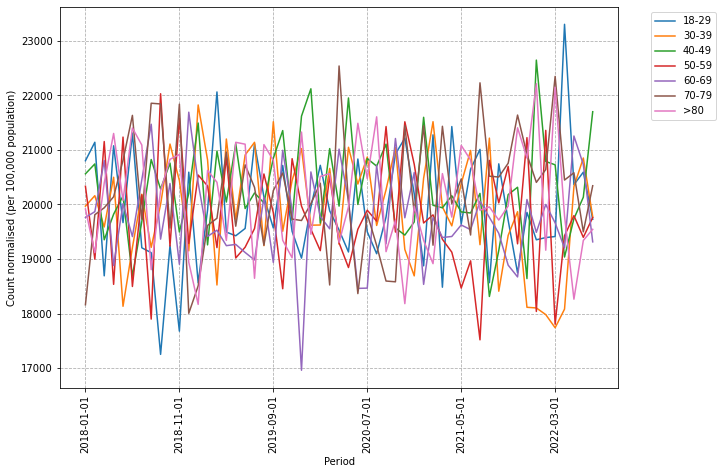

In [7]:
age_trend=pd.read_csv("../output/filtered/measure_doacs_by_age_band_rate.csv", usecols=["date", "age_band", "on_doac", "population"])
age_trend['on_doac'] = (age_trend['on_doac'] / age_trend['population'] * 100000)
age_subset3=age_trend.loc[age_trend["age_band"] != "missing", :]
pivot_age3=age_subset3.pivot(index='date', columns='age_band', values='on_doac')
pivot_age3.plot(kind='line', figsize=(10,7))
plt.ylabel('Count normalised (per 100,000 population)')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_06_all_doacs_by_age_band_normalised.png')
plt.show()

#### 3. Number of people (absolute & normalised) prescribed a DOAC by sex

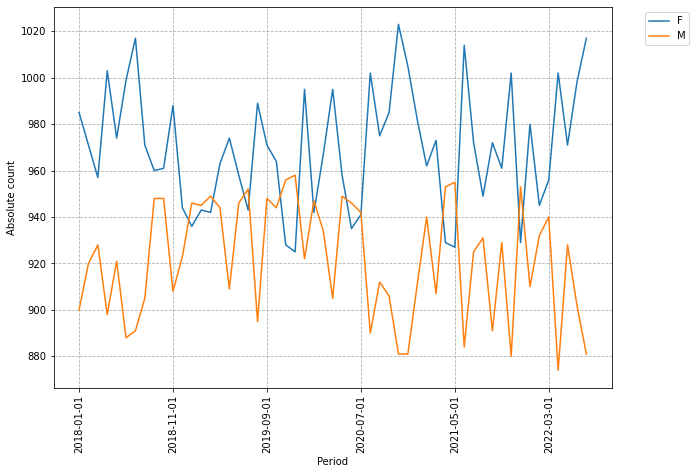

In [8]:
sex_line=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "sex", "on_doac", "population"])
sex_subset2=sex_line.loc[sex_line["sex"].isin(["F", "M"])]
pivot_sex2=sex_subset2.pivot(index='date', columns='sex', values='on_doac')
pivot_sex2.plot(kind='line', figsize=(10,7)) 
plt.ylabel('Absolute count')
plt.xlabel('Period')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.grid(linestyle='dashed')
#plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_07_all_doacs_by_sex_absolute.png')
plt.show() 

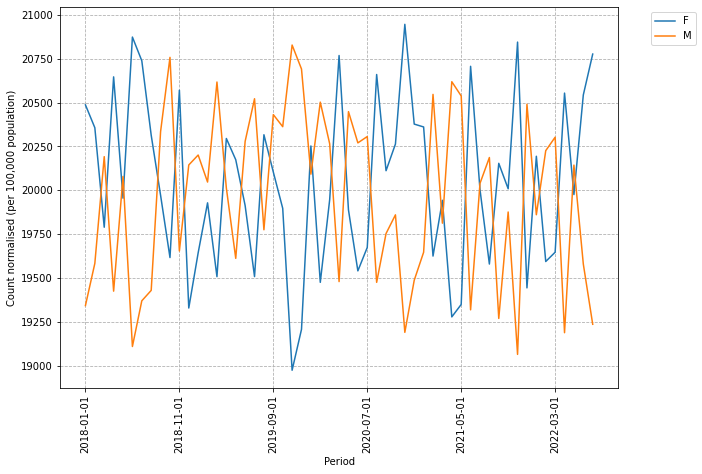

In [9]:
sex_trend=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "sex", "on_doac", "population"])
sex_trend['on_doac'] = (sex_trend['on_doac'] / sex_trend['population'] * 100000)
sex_subset3=sex_trend.loc[sex_trend["sex"].isin(["F", "M"])]
pivot_sex3=sex_subset3.pivot(index='date', columns='sex', values='on_doac')
pivot_sex3.plot(kind='line', figsize=(10,7))
plt.ylabel('Count normalised (per 100,000 population)')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_08_all_doacs_by_sex_normalised.png')
plt.show()

#### 4. Mean age by sex

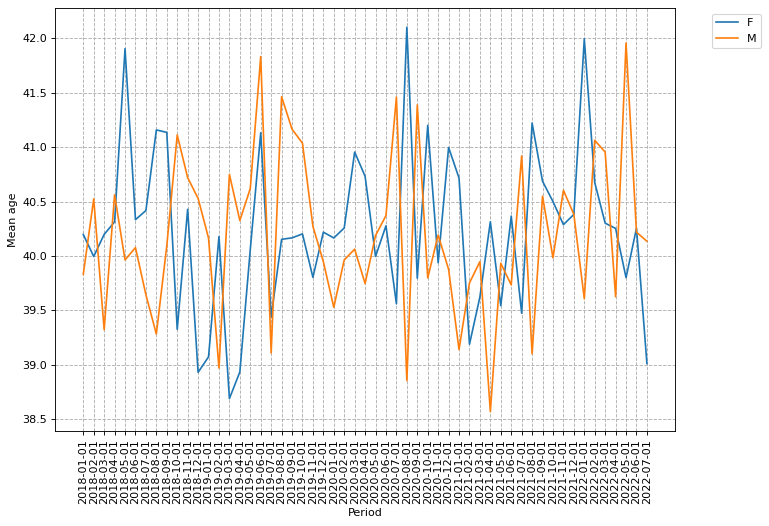

In [10]:
sexage_df=pd.read_csv("../output/filtered/measure_doacs_by_sex_and_age_rate.csv", usecols=["date", "age", "sex", "on_doac"])
sexage_df["age_doac"] = (sexage_df["age"] * sexage_df["on_doac"])
female_subset=sexage_df.loc[sexage_df["sex"] == "F", :]
female_df=female_subset.groupby(["date"], as_index=False)[["age_doac", "on_doac"]].sum()
female_df["femaleage"] = female_df["age_doac"] / female_df["on_doac"]

male_subset=sexage_df.loc[sexage_df["sex"] == "M", :]
male_df=male_subset.groupby(["date"], as_index=False)[["age_doac", "on_doac"]].sum()
male_df["maleage"] = male_df["age_doac"] / male_df["on_doac"]

x1_coordinates=female_df["date"]
y1_coordinates=female_df["femaleage"]
x2_coordinates=male_df["date"]
y2_coordinates=male_df["maleage"]
plt.figure(figsize=(10,7), dpi=80)
plt.plot(x1_coordinates, y1_coordinates, label='F')
plt.plot(x2_coordinates, y2_coordinates, label='M')
plt.ylabel('Mean age')
plt.xlabel('Period')
#plt.ylim(ymin=60, ymax=90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_09_mean_age_by_sex.png')
plt.show()


#### 5. Proportion (%) of people on a DOAC identified as being a 'caregiver'

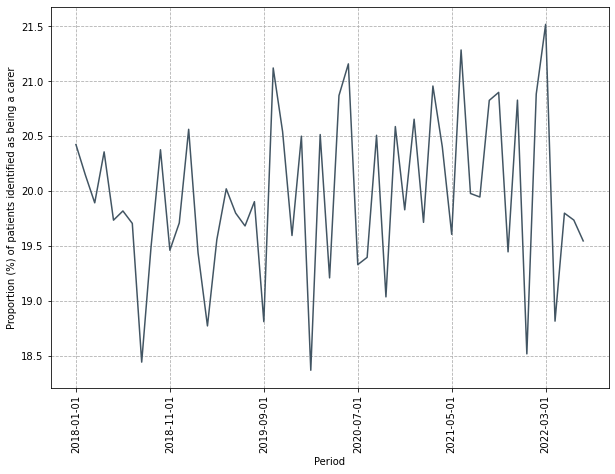

In [11]:
carer_df=pd.read_csv("../output/filtered/measure_doacs_by_carer_rate.csv", usecols=["date", "carer", "on_doac", "value"])
carer_df['value'] = 100 * carer_df['value']
carer_subset=carer_df.loc[(carer_df["on_doac"] != 0), :]
pivot_carer = carer_subset.pivot(index='date', columns='on_doac', values='value')
pivot_carer.plot(kind='line', color=('#425563'), figsize=(10,7), legend='')
plt.ylabel('Proportion (%) of patients identified as being a carer')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_10_proportion_recorded_as_carer.png')
plt.show() 

### The proportion (%) of people on a DOAC who have a specific event recorded in the last 12 months

#### a. Proportion of people prescribed a DOAC with a weight recorded in the last 12 months

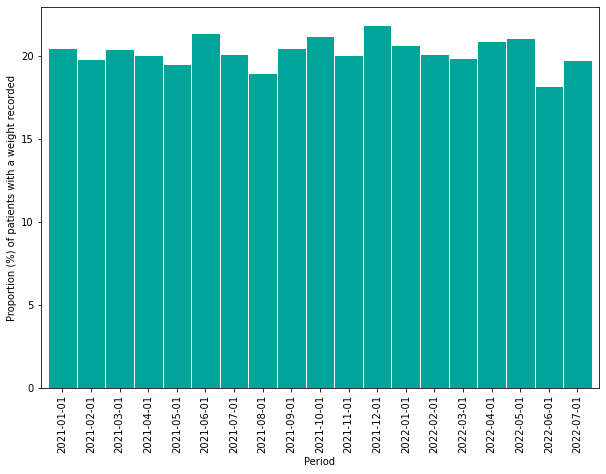

In [12]:
weight_df=pd.read_csv("../output/filtered/measure_doacs_with_weight_recorded_rate.csv", usecols=["date", "weight_recorded", "on_doac", "value"])
weight_df['value'] = 100 * weight_df['value']
weight_subset=weight_df.loc[(weight_df["on_doac"] != 0) & (weight_df["date"] >= '2021-01-01'), :]
pivot_weight = weight_subset.pivot(index='date', columns='on_doac', values='value')
pivot_weight.plot(kind='bar', color=('#00A499'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with a weight recorded')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_11_proportion_with_weight_recorded.png')
plt.show() 

#### b. The proportion (%) of people prescribed a DOAC with an eGFR recorded in the last 12 months

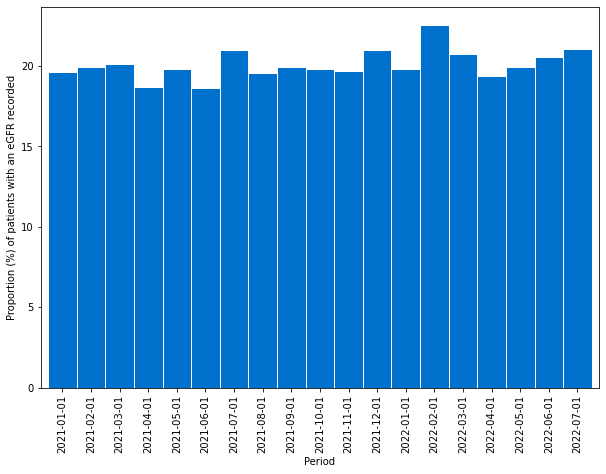

In [13]:
egfr_df=pd.read_csv("../output/filtered/measure_doacs_with_egfr_recorded_rate.csv", usecols=["date", "egfr_recorded", "on_doac", "population", "value"])
egfr_df['value'] = 100 * egfr_df['value']
egfr_subset=egfr_df.loc[(egfr_df["on_doac"] != 0) & (egfr_df["date"] >= '2021-01-01'), :]
pivot_egfr = egfr_subset.pivot(index='date', columns='on_doac', values='value')
pivot_egfr.plot(kind='bar', color=('#0072CE'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with an eGFR recorded')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_12_proportion_with_egfr_recorded.png')

#### c. The proportion (%) of people prescribed a DOAC with serum creatinine recorded in the last 12 months

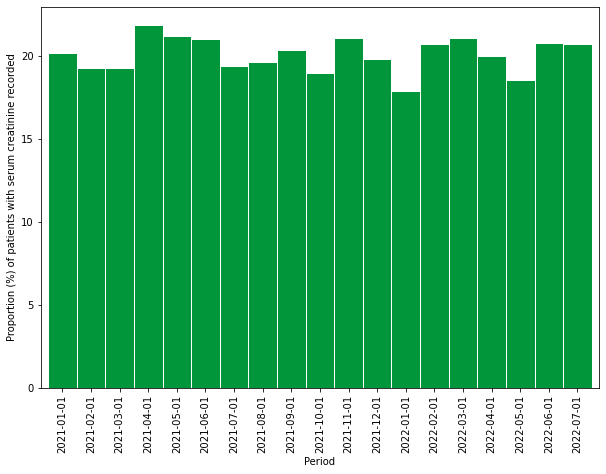

In [14]:
sc_df=pd.read_csv("../output/filtered/measure_doacs_with_serumcreatinine_recorded_rate.csv", usecols=["date", "serumcreatinine_recorded", "on_doac", "population", "value"])
sc_df['value'] = 100 * sc_df['value']
sc_subset=sc_df.loc[(sc_df["on_doac"] != 0) & (sc_df["date"] >= '2021-01-01'), :]
pivot_sc = sc_subset.pivot(index='date', columns='on_doac', values='value')
pivot_sc.plot(kind='bar', color=('#009639'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with serum creatinine recorded')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_13_proportion_with_serumcreatinine_recorded.png')

#### d. The proportion (%) of people prescribed a DOAC with creatinine clearance (Cr/Cl) recorded in the last 12 months

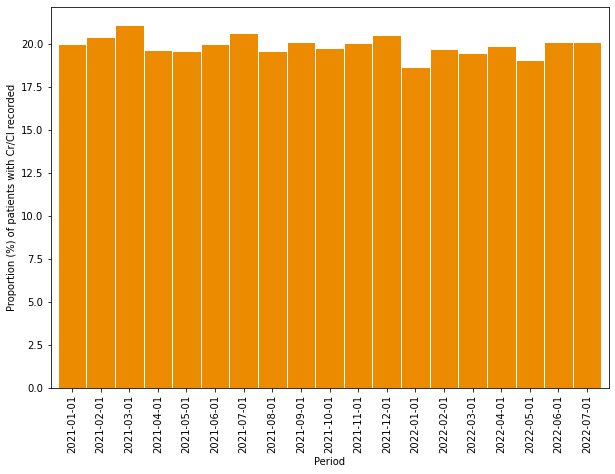

In [15]:
crcl_df=pd.read_csv("../output/filtered/measure_doacs_with_crcl_recorded_rate.csv", usecols=["date", "crcl_recorded", "on_doac", "population", "value"])
crcl_df['value'] = 100 * crcl_df['value']
crcl_subset=crcl_df.loc[(crcl_df["on_doac"] != 0) & (crcl_df["date"] >= '2021-01-01'), :]
pivot_crcl = crcl_subset.pivot(index='date', columns='on_doac', values='value')
pivot_crcl.plot(kind='bar', color=('#ED8B00'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with Cr/Cl recorded')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_14_proportion_with_crcl_recorded.png')

#### e. The proportion (%) of people prescribed a DOAC with serum creatinine recorded in the last 12 months but no creatinine clearance (Cr/Cl)

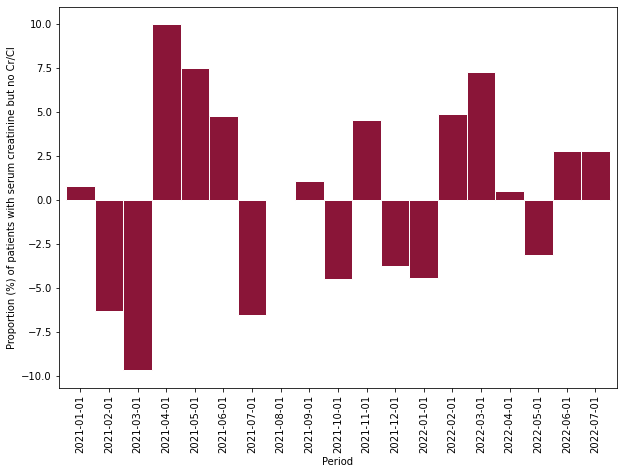

In [16]:
crcl2_df=pd.read_csv("../output/filtered/measure_doacs_with_serumcreatinine_and_crcl_recorded_rate.csv", usecols=["date", "crcl_recorded", "on_doac", "serumcreatinine_recorded", "value"])
crcl2_df['value'] = 100 - (100 * crcl2_df['value'])
crcl2_subset=crcl2_df.loc[(crcl2_df["on_doac"] != 0) & (crcl2_df["date"] >= '2021-01-01'), :]
pivot_crcl2 = crcl2_subset.pivot(index='date', columns='on_doac', values='value')
pivot_crcl2.plot(kind='bar', color=('#8A1538'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with serum creatinine but no Cr/Cl')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_15_proportion_with_serumcreatinine_and_crcl_recorded.png')

### Reviewing DOACs in patients with Non-Valvular Atrial Fibrillation in the latest 12 months

#### i. The proportion (%) of people prescribed a DOAC with Non-Valvular Atrial Fibrillation

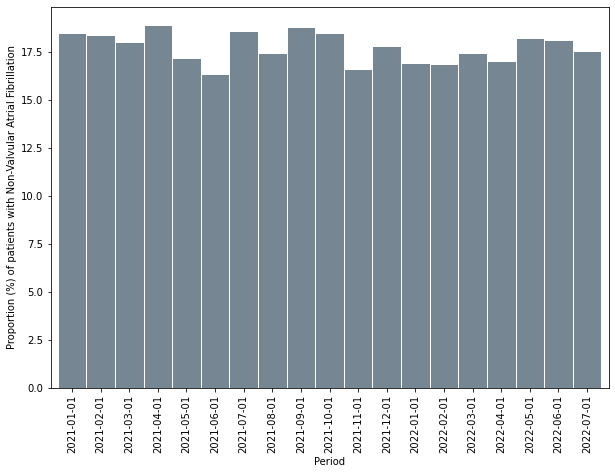

In [17]:
af_df=pd.read_csv("../output/filtered/measure_doacs_with_af_recorded_rate.csv", usecols=["date", "atrial_fib", "on_doac", "population", "value"])
af_df['value'] = 100 * af_df['value']
af_subset=af_df.loc[(af_df["on_doac"] != 0) & (af_df["date"] >= '2021-01-01'), :]
pivot_af = af_subset.pivot(index='date', columns='on_doac', values='value')
pivot_af.plot(kind='bar', color=('#768692'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with Non-Valvular Atrial Fibrillation')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_16_proportion_with_af_recorded.png')

#### ii. The proportion (%) of people prescribed a DOAC with Non-Valvular Atrial Fibrillation and with Cr/Cl recorded in the last 12 months

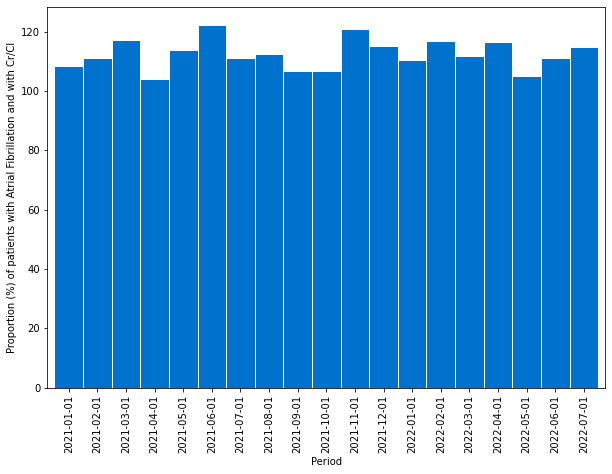

In [18]:
af_crcl=pd.read_csv("../output/filtered/measure_doacs_with_af_and_crcl_recorded_rate.csv", usecols=["date", "crcl_recorded", "on_doac", "atrial_fib", "value"])
af_crcl['value'] = (100 * af_crcl['value'])
afcrcl_subset=af_crcl.loc[(af_crcl["on_doac"] != 0) & (af_crcl["date"] >= '2021-01-01'), :]
pivot_afcrcl = afcrcl_subset.pivot(index='date', columns='on_doac', values='value')
pivot_afcrcl.plot(kind='bar', color=('#0072CE'), edgecolor='white', figsize=(10,7), width=1, legend='')
plt.ylabel('Proportion (%) of patients with Atrial Fibrillation and with Cr/Cl')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/plot_17_proportion_with_af_and_crcl_recorded.png')

#### iii. The proportion (%) of people prescribed a DOAC with Non-Valvular Atrial Fibrillation and with Cr/Cl recorded in the last 12 months, where the recommended DOAC dose (calculated using recorded Cr/Cl) does not match prescribed DOAC dose.
https://cks.nice.org.uk/topics/anticoagulation-oral/

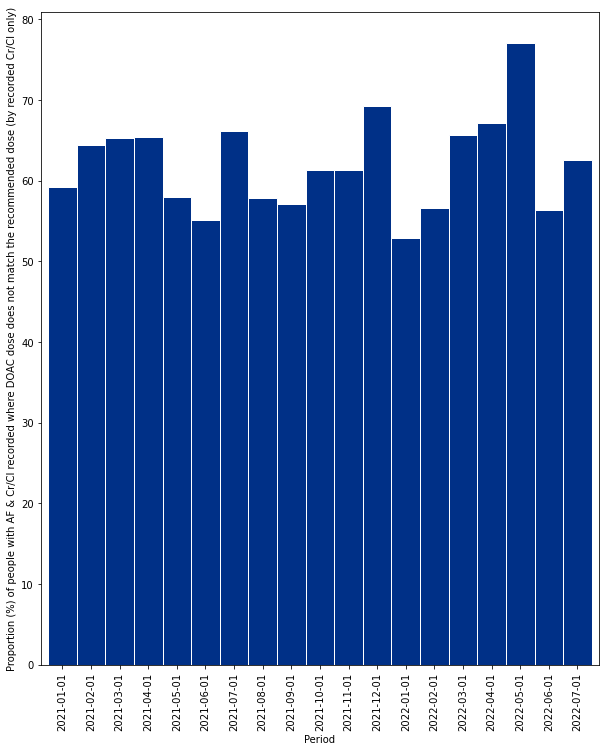

In [19]:
af_dose=pd.read_csv("../output/filtered/measure_doacs_dose_match_rate.csv", usecols=["date", "af_&_crcl", "on_doac", "dose_match", "value"])
af_dose['value'] = 100 - (100 * af_dose['value'])
dose_subset=af_dose.loc[(af_dose["on_doac"] != 0) & (af_dose["date"] >= '2021-01-01'), :]
pivot_dose = dose_subset.pivot(index='date', columns='on_doac', values='value')
pivot_dose.plot(kind='bar', color=('#003087'), edgecolor='white', figsize=(10,12), width=1, legend='')
plt.ylabel('Proportion (%) of people with AF & Cr/Cl recorded where DOAC dose does not match the recommended dose (by recorded Cr/Cl only)')
plt.xlabel('Period')
#plt.ylim(ymin=0)
plt.gca()
plt.savefig(f'../output/filtered/dose_match.png')

In [20]:
age_subset2.to_csv(f'../output/filtered/age_subset_count_rate.csv')

In [21]:
age_subset3.to_csv(f'../output/filtered/age_subset_normalised_rate.csv')

In [22]:
sex_subset2.to_csv(f'../output/filtered/sex_subset_count_rate.csv')

In [23]:
sex_subset3.to_csv(f'../output/filtered/sex_subset_normalised_rate.csv')

In [24]:
male_df.to_csv(f'../output/filtered/meanagemale_subset_rate.csv')

In [25]:
female_df.to_csv(f'../output/filtered/meanagefemale_subset_rate.csv')